Start homogeneous
('Homogeneous result time= ', 4.695810079574585)


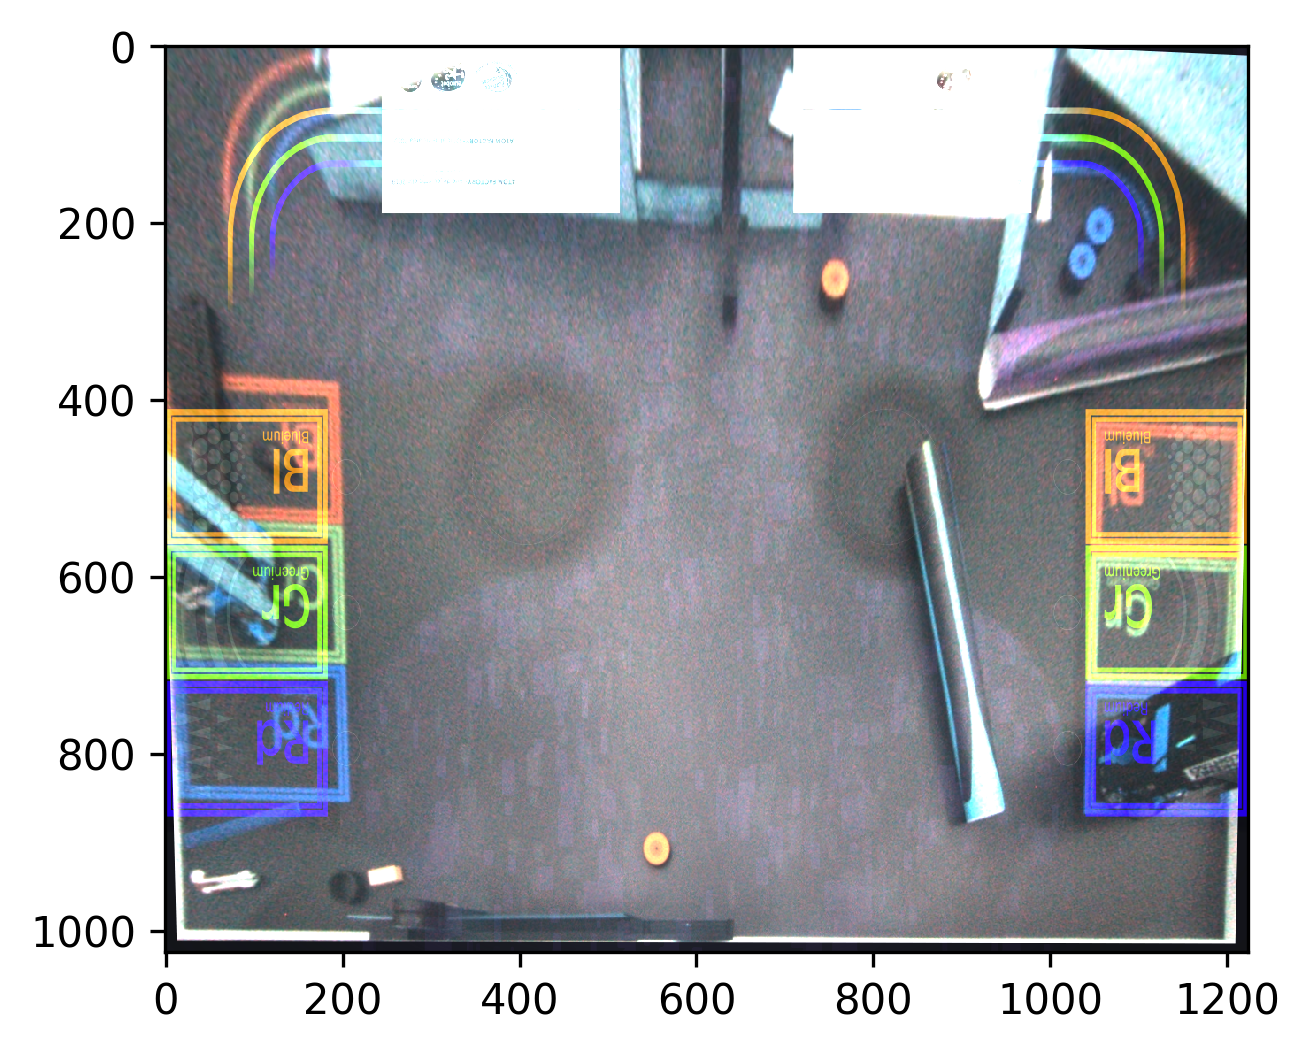

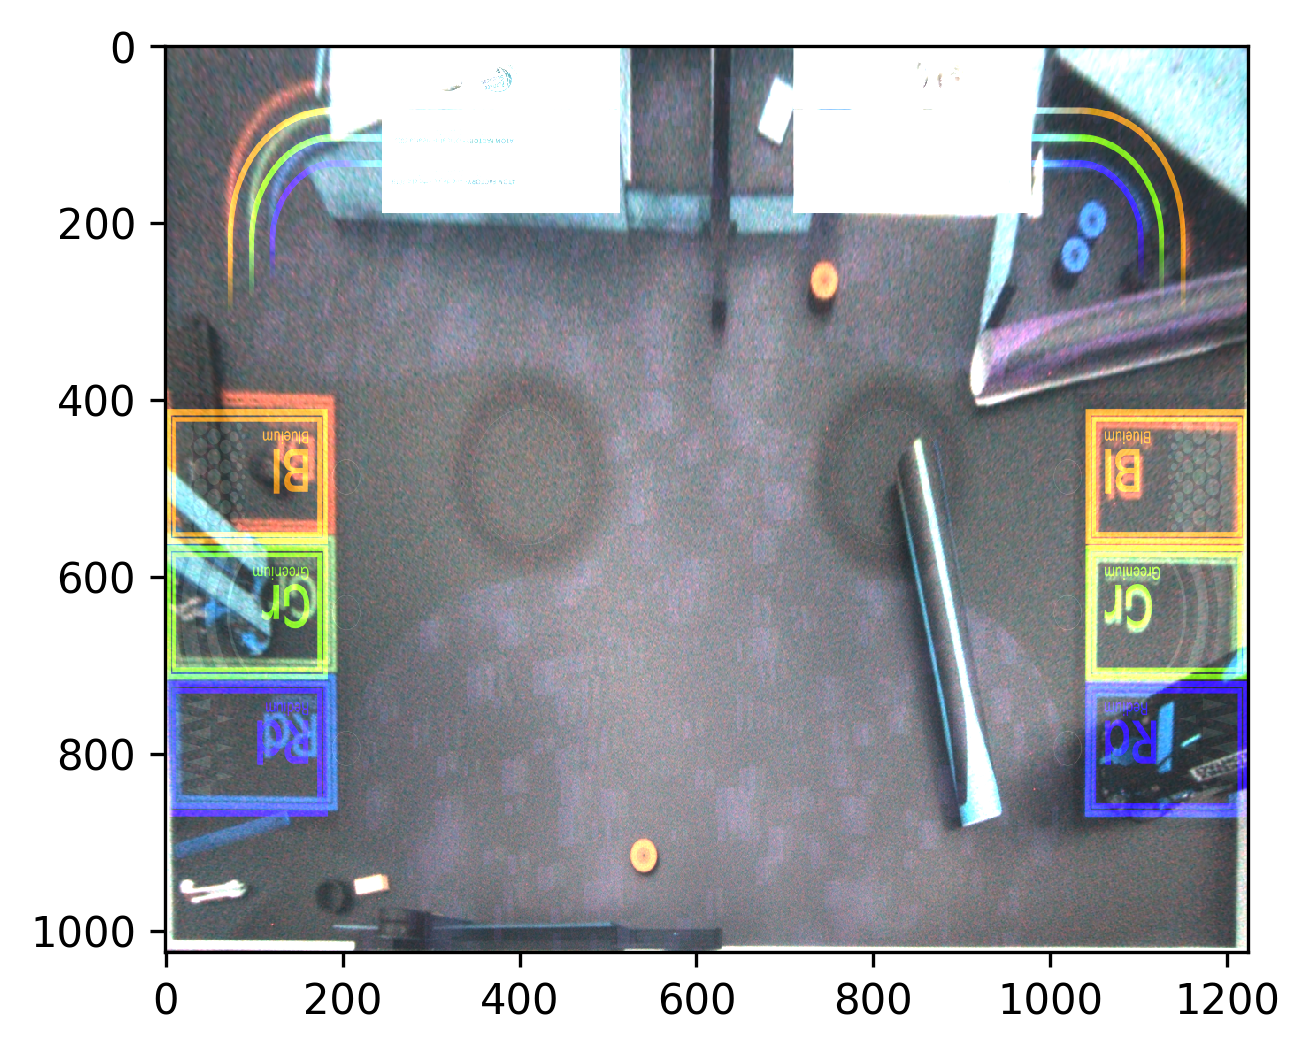

In [9]:
#!/usr/bin/env python

import numpy as np
import cv2
from cv_bridge import CvBridge, CvBridgeError
import rospy
import sensor_msgs
from sensor_msgs.msg import Image

import matplotlib.pyplot as plt

import time

def homogeneous(rx,ry,templ_path='/home/alexey/Desktop/field.png'):
    start_time = time.time()
    print ('Start homogeneous')
    
    img = cv2.imread("/home/alexey/Desktop/field1.png")
    tmp =  cv2.imread(templ_path);
    tmp = cv2.resize(tmp, (int(rx),int(ry)), interpolation = cv2.INTER_AREA)
    img = cv2.resize(img, (int(rx),int(ry)), interpolation = cv2.INTER_AREA)

    
    # Convert images to grayscale
    tmp_gray = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_gray = clahe.apply(img_gray)
    
    # Define the motion model
    warp_mode = cv2.MOTION_HOMOGRAPHY

    warp_matrix = np.eye(3, 3, dtype=np.float32)

    # Specify the number of iterations.
    number_of_iterations = 5000;

    # Specify the threshold of the increment
    # in the correlation coefficient between two iterations
    termination_eps = 1e-6;

    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)



    
    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (tmp_gray,img_gray,warp_matrix, warp_mode, criteria)
    
    result_time = time.time() - start_time
    print ('Homogeneous result time= ', result_time)
    img_aligned = cv2.warpPerspective (img, warp_matrix, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
    plt.imshow(img_aligned*0.5/127+tmp*0.5/127)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
    plt.imshow(img*0.5/127+tmp*0.5/127)
    
homogeneous(2448./2,2048./2)
    
